

# Project: Investigate TMDB dataset.



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, the TMBd Movie Dataset was analyzed. This dataset contains information for over 10,000 moveis obtained from The Movie Data Base(TMBd). The dataset contains information about movie genres, production company, director, cast, release date, budget, revenue and etc. Besides, a popularity value in this dataset was built by TMBd which represents how popular the movie is. 


> Research questions:
1. The relationship between adjusted revenue and popularity
2. The relationship between adjusted revenue and bugdets.
3. The relationship between vote count/vote average with profits. 
3. The relationship between profits with movie genre. 
4. The relationship between profits with movie director.
5. The relationship between the profits with movie cast.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
tmdb = pd.read_csv("tmdb-movies.csv")

In [3]:
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
tmdb.shape

(10866, 21)

In [5]:
tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Is there any missing values?

In [6]:
tmdb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data cleaning

Since we are only using part of the data, we will reduce it to a smaller number of features for further analysis.

In [7]:
small_tmdb = tmdb.loc[:,["popularity","original_title","director",'runtime',"genres"\
                       ,"vote_count","vote_average","budget_adj","revenue_adj"]]

In [8]:
small_tmdb.head()

,popularity,original_title,director,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,1.747999e+08,1.385749e+09


In [9]:
small_tmdb.isna().sum()

popularity         0
original_title     0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
budget_adj         0
revenue_adj        0
dtype: int64

Let us explore the data where the director info is missing. 

In [10]:
small_tmdb[small_tmdb.director.isna()]

,popularity,original_title,director,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj
532,0.126594,Iliza Shlesinger: Freezing Hot,NaN,71,Comedy,14,6.6,0.000000e+00,0.000000e+00
548,0.108072,Sense8: Creating the World,NaN,25,Documentary|Science Fiction,12,7.5,0.000000e+00,0.000000e+00
556,0.100910,With This Ring,NaN,105,Comedy|Romance,14,6.5,0.000000e+00,0.000000e+00
1032,0.291253,Marvel Studios: Assembling a Universe,NaN,43,TV Movie|Documentary,32,6.3,0.000000e+00,0.000000e+00
1054,0.269468,Unlocking Sherlock,NaN,60,TV Movie|Documentary,11,7.2,0.000000e+00,0.000000e+00
1203,0.119891,Free to Play,NaN,75,Documentary,40,7.0,1.381637e+05,0.000000e+00
1241,0.135376,Dance-Off,NaN,0,Romance|Music|Comedy,18,5.7,0.000000e+00,0.000000e+00
1288,0.038364,Top Gear: The Perfect Road Trip 2,NaN,94,Documentary,12,6.8,0.000000e+00,0.000000e+00
1852,0.256703,The Diary of Anne Frank,NaN,100,Drama,19,7.5,0.000000e+00,0.000000e+00
1872,0.091395,Paa,NaN,133,Drama|Family|Foreign,11,6.1,3.303301e+06,0.000000e+00


As we can see from the table, most of the data where the director is missing the adjusted revenue is 0. 

Before we proceed with more analysis with the adjusted revenue, we will need to understand the distribution of the revenue. 

C:\Users\luicy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


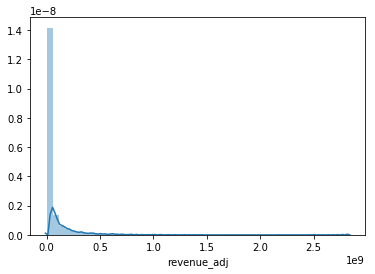

In [11]:
sns.distplot(small_tmdb['revenue_adj'])

Let us remove the 0 revenue movies and look at the revenue distribution again.

In [12]:
revenue_adj_log = np.log10(small_tmdb.loc[small_tmdb.revenue_adj>0,"revenue_adj"])

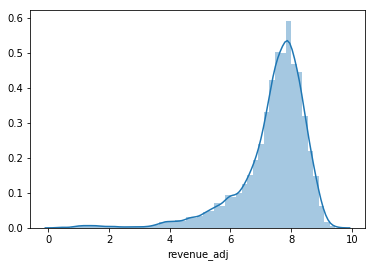

In [13]:
sns.distplot(revenue_adj_log)

The above is the log10 plot of the adjusted revenue.It would make sense to change the revenue in a log 10 based value for easy visualization.

Get rid of revenue that is 0 and create a new column to store the log10 transformation of the adjusted revenue. 

In [14]:
small_tmdb['revenue_adj'] = small_tmdb['revenue_adj'].replace({0:np.nan})

In [15]:
small_tmdb.shape

(10866, 9)

In [16]:
small_tmdb.dropna(inplace = True)

In [17]:
small_tmdb.isna().sum()

popularity        0
original_title    0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
budget_adj        0
revenue_adj       0
dtype: int64

In [18]:
small_tmdb['log_rev_adj'] = np.log10(small_tmdb['revenue_adj'])

log10 transform the budgets.

In [19]:
small_tmdb['budget_adj'] = small_tmdb['budget_adj'].replace(0, np.nan)
small_tmdb['log_bug_adj'] = np.log10(small_tmdb['budget_adj'])

In [20]:
small_tmdb.isna().sum()

popularity          0
original_title      0
director            0
runtime             0
genres              0
vote_count          0
vote_average        0
budget_adj        995
revenue_adj         0
log_rev_adj         0
log_bug_adj       995
dtype: int64

## Adjusted revenue

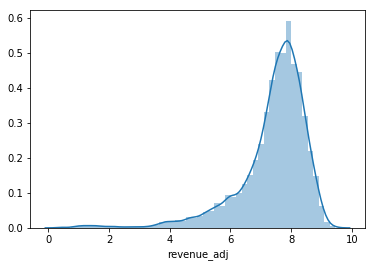

In [21]:
revenue_adj_log = np.log10(small_tmdb.loc[:,"revenue_adj"])

sns.distplot(revenue_adj_log)

The mode of adjusted revenue is around 100 million dollars. 

## Adjusted budgets

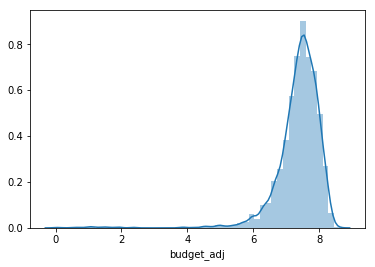

In [22]:
budget_adj_log = np.log10(small_tmdb.loc[small_tmdb.budget_adj>0,"budget_adj"].copy())

sns.distplot(budget_adj_log)

The mode of adjusted budgets is between 10 millions and 100 million dollars. 

## Profits

Create the adjusted profits column. 

In [23]:
small_tmdb['profits_adj'] = small_tmdb['revenue_adj'] - small_tmdb['budget_adj']

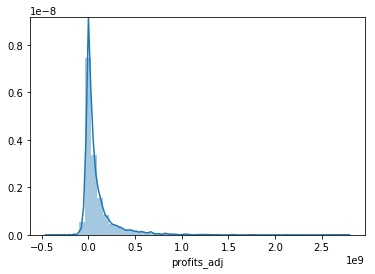

In [24]:
profits_adj = small_tmdb.loc[small_tmdb.profits_adj.notna(),'profits_adj'].copy()

sns.distplot(profits_adj )

The majority of the movies does not make much profits (less than 500 million dollar profits). The mode of the profit is slightly bigger than 0. 

## Vote count

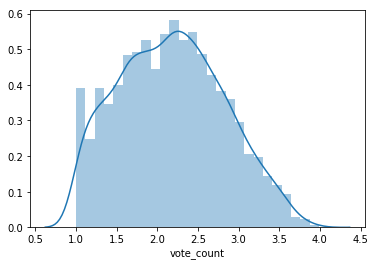

In [25]:
sns.distplot(np.log10(small_tmdb['vote_count']))

The majority of the movies get from 10 to 10000 votes. 

## Vote average

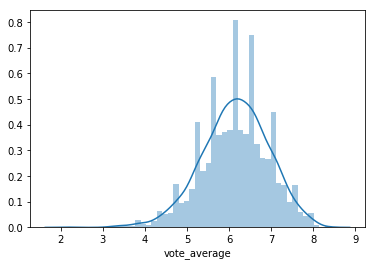

In [26]:
sns.distplot(small_tmdb['vote_average'])

The mode of the voting average is about 6.3. 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (adjusted revenue vs popularity)

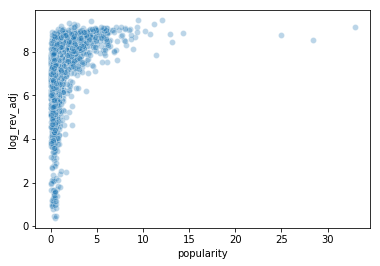

In [27]:
sns.scatterplot(x = "popularity", y = "log_rev_adj",data = small_tmdb,alpha = 0.3)

For a better visualization of the density of movies in the above plot.

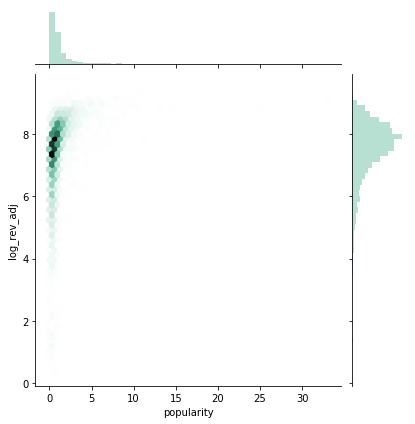

In [28]:
sns.jointplot(x = "popularity", y = "log_rev_adj",data = small_tmdb,kind="hex",color="#4CB391")

There is no clear correlation between the popularity with the movie adjusted revenue. 

### Research Question 2  (adjusted revenue and budgets)

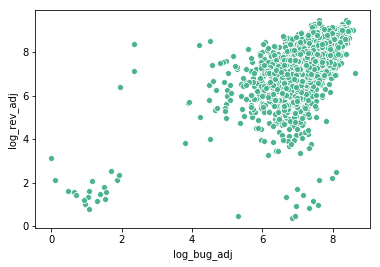

In [29]:
sns.scatterplot(x = "log_bug_adj", y = "log_rev_adj",data = small_tmdb,color="#4CB391")

There is a strong correlation between movie budgets and revenue. The correlation is stronger when either of them are higher. 
But there is still some movies with really high budgets and relatively lower revenue. 

### Research Question 3 (adjusted profits and directors)


In [30]:
small_tmdb['profit_adj'] = small_tmdb['revenue_adj'] - small_tmdb['budget_adj']

In [31]:
small_tmdb.groupby('director').agg({"profit_adj":"sum","director":"count"}).\
sort_values(by = "profit_adj",ascending = False).head()

,profit_adj,director
director,,
Steven Spielberg,1.312603e+10,27
James Cameron,6.296578e+09,8
George Lucas,5.844159e+09,6
Peter Jackson,5.645492e+09,11
Robert Zemeckis,4.335995e+09,15


It comes with no surprise that James, George and Steven are the directors that produced a lot of high profit movies. 
James Cameron has the highest profit per movie compared to the other two. 

### Research Question 4 (adjusted revenue and movie genre)


There are many genres in a movie, and we will use the first one as its main genre.

In [32]:
small_tmdb["major_genre"] = small_tmdb['genres'].str.split("|",expand = True).iloc[:,0]    

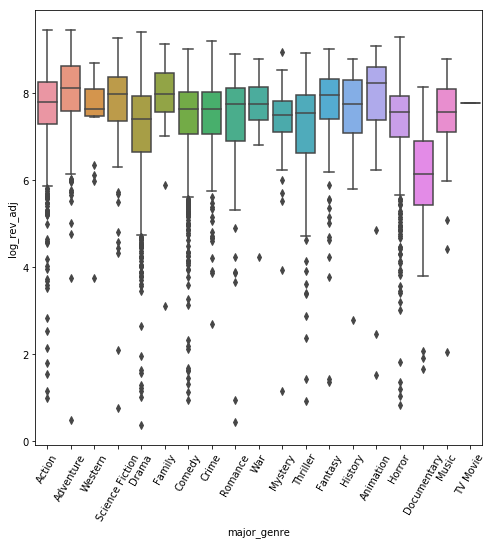

In [33]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "major_genre", y = "log_rev_adj", data = small_tmdb)
plt.xticks(rotation=60);

There is not a clear difference of movie revenue between different genres except that documentary movies have a lower median revenue. 

<a id='conclusions'></a>
## Conclusions

1. The mode of the movie budgets is 100 million dollars. 
2. Popularity has no clear correlation with revenue. 
3. Revenues are positively correlated with budgets. 
4. The top 3 director in term of profits generated are Steven Spielberg, James Cameron and George Lucas, whereas Lucas has the highest per movie profits. 
5. Documentary movies have a much lower median adjusted revenue compared to other movie genres. The Drama genre has the biggest variance in terms of adjusted revenue. 